<h1>CAR PRICE PREDICTION</h1>
<b>Submitted By Harsh Manchanda</b>

This is a Machine Learning project to predict the price of used cars.

I have used 3 Regression Models:

1. Linear Regression
2. Lasso Regression
3. Polynomial Regression

<h3>Importing Dependencies<h3>

In [369]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

<h3>Data collection and Pre processing <h3>

In [370]:
car_df = pd.read_csv('Car details v3.csv')

In [371]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [372]:
car_df.shape

(8128, 13)

There are 13 colums and 8128 rows in this data set

In [373]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Since, data in columns mileage, engine, and max_power should be in numerical but info() shows that these columns are objects as there are some string present in the data with numerical values. <br>
We have to remove these string values and our data should only contains numerical values at model deployement stage 

In [374]:
car_df['mileage'] = car_df['mileage'].str.replace('kmpl','')
car_df['engine'] = car_df['engine'].str.replace('CC','')
car_df['max_power'] = car_df['max_power'].str.replace('bhp','')
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


Dropping column torque from the data set

In [375]:
car_df = car_df.drop(['torque'],axis=1)
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0


In [376]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


Converting datatype of mileage, engine and max_power to numeric

In [377]:
car_df['mileage'] = pd.to_numeric(car_df['mileage'], errors='coerce')
car_df['engine'] = pd.to_numeric(car_df['engine'], errors='coerce')
car_df['max_power'] = pd.to_numeric(car_df['max_power'], errors='coerce')
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7819 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


<h3>Identify and handle missing values<h3>

<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [378]:
missing_data = car_df.isnull()
missing_data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.

<h3>Count missing values in each column<h3>

In [379]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

name
False    8128
Name: name, dtype: int64

year
False    8128
Name: year, dtype: int64

selling_price
False    8128
Name: selling_price, dtype: int64

km_driven
False    8128
Name: km_driven, dtype: int64

fuel
False    8128
Name: fuel, dtype: int64

seller_type
False    8128
Name: seller_type, dtype: int64

transmission
False    8128
Name: transmission, dtype: int64

owner
False    8128
Name: owner, dtype: int64

mileage
False    7819
True      309
Name: mileage, dtype: int64

engine
False    7907
True      221
Name: engine, dtype: int64

max_power
False    7912
True      216
Name: max_power, dtype: int64

seats
False    7907
True      221
Name: seats, dtype: int64



Based on the summary above, each column has 8128 rows of data and four of the columns containing missing data:

<ol>
    <li>"mileage": 309 missing data</li>
    <li>"engine": 221 missing data</li>
    <li>"max_power": 216 missing data</li>
    <li>"seats" : 221 missing data</li>
</ol>

<h3>Deal with missing data</h3>

Since, our dataset is big with 8128 rows. Therefore, we will replace the missing data with the mean.

Calculating mean values for mileage, engine, max_power and seats.

In [380]:
avg_mileage_loss = car_df["mileage"].astype("float").mean(axis=0)
avg_engine_loss = car_df["engine"].astype("float").mean(axis=0)
avg_max_power_loss = car_df["max_power"].astype("float").mean(axis=0)
avg_seats_loss = car_df["seats"].astype("float").mean(axis=0)
print("Average of mileage:", avg_mileage_loss)
print("Average of engine:", avg_engine_loss)
print("Average of max_power:", avg_max_power_loss)
print("Average of seats:", avg_seats_loss)

Average of mileage: 19.39037472822611
Average of engine: 1458.625015808777
Average of max_power: 91.51791898382203
Average of seats: 5.41671936259011


Replace "NaN" with mean value in all the above columns having missing data

In [381]:
car_df["mileage"].replace(np.nan, round(avg_mileage_loss,2), inplace=True)
car_df["engine"].replace(np.nan, round(avg_engine_loss), inplace=True)
car_df["max_power"].replace(np.nan, round(avg_max_power_loss,2), inplace=True)
car_df["seats"].replace(np.nan, round(avg_seats_loss), inplace=True)

In [382]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float64
 11  seats          8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


<h3>Convert data type to proper format </h3>

In [383]:
car_df['engine'] = car_df['engine'].astype('int')
car_df['seats'] = car_df['seats'].astype('int')

In [384]:
car_df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int32
max_power        float64
seats              int32
dtype: object

<h3>Checking distribution of categorical data in the columns: </h3> 

1. fuel
2. seller_type 
3. transmission 
4. owner 

In [385]:
print('fuel: ',car_df.fuel.unique())
print('seller_type: ',car_df.seller_type.unique())
print('transmission: ',car_df.transmission.unique())
print('owner: ',car_df.owner.unique())

fuel:  ['Diesel' 'Petrol' 'LPG' 'CNG']
seller_type:  ['Individual' 'Dealer' 'Trustmark Dealer']
transmission:  ['Manual' 'Automatic']
owner:  ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [386]:
print('fuel: ',car_df.fuel.value_counts())
print('seller_type: ',car_df.seller_type.value_counts())
print('transmission: ',car_df.transmission.value_counts())
print('owner: ',car_df.owner.value_counts())

fuel:  Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64
seller_type:  Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64
transmission:  Manual       7078
Automatic    1050
Name: transmission, dtype: int64
owner:  First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64


<h3>Encoding categorical data</h3>

In [387]:
car_df.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3}},inplace=True)
car_df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
car_df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':3}},inplace=True)

In [388]:
print('fuel: ',car_df.fuel.unique())
print('seller_type: ',car_df.seller_type.unique())
print('transmission: ',car_df.transmission.unique())
print('owner: ',car_df.owner.unique())

fuel:  [0 1 3 2]
seller_type:  [0 1 2]
transmission:  [0 1]
owner:  [0 1 2 3]


In [389]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,0,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,1,21.14,1498,103.52,5
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,2,17.70,1497,78.00,5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,0,23.00,1396,90.00,5
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,0,16.10,1298,88.20,5


<h2> Model Deployement and Evaluation</h2>

<h4>Splitting Data into training and testing data</h4>

In [390]:
X = car_df.drop(['name','selling_price'], axis=1)
Y = car_df['selling_price']

In [391]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner  mileage  \
0     2014     145500     0            0             0      0    23.40   
1     2014     120000     0            0             0      1    21.14   
2     2006     140000     1            0             0      2    17.70   
3     2010     127000     0            0             0      0    23.00   
4     2007     120000     1            0             0      0    16.10   
...    ...        ...   ...          ...           ...    ...      ...   
8123  2013     110000     1            0             0      0    18.50   
8124  2007     119000     0            0             0      3    16.80   
8125  2009     120000     0            0             0      0    19.30   
8126  2013      25000     0            0             0      0    23.57   
8127  2013      25000     0            0             0      0    23.57   

      engine  max_power  seats  
0       1248      74.00      5  
1       1498     103.52      5  
2       1497

In [392]:
print(Y)

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64


<h3> Function for Plotting </h3>

In [393]:
#Function for plotting distplot
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

<h3>Model Training</h3>

<h3>

1. Linear Regression

</h3>

In [394]:
#Splitting Train and test data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.45, random_state=2)

In [395]:
linear_reg = LinearRegression()

In [396]:
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [397]:
training_data_prediction = linear_reg.predict(X_train)
test_data_prediction = linear_reg.predict(X_test)

In [398]:
#Calculate R squared error for training data
print('R Squared Error for training data: ',linear_reg.score(X_train, Y_train))
print("R squared Error for testing data: ",linear_reg.score(X_test, Y_test))

R Squared Error for training data:  0.6724797759842325
R squared Error for testing data:  0.6638131107861478


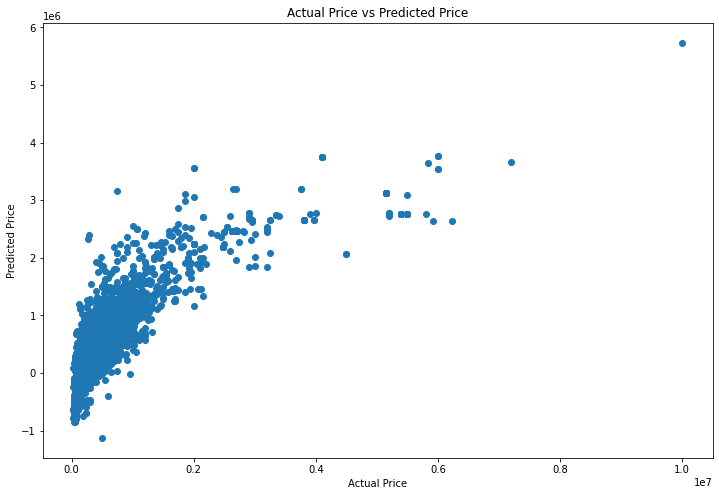

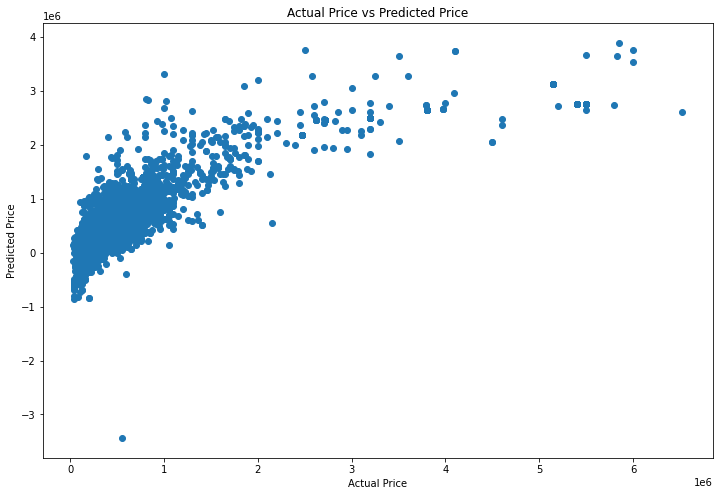

In [399]:
plt.figure(figsize=(12,8))
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

plt.figure(figsize=(12,8))
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


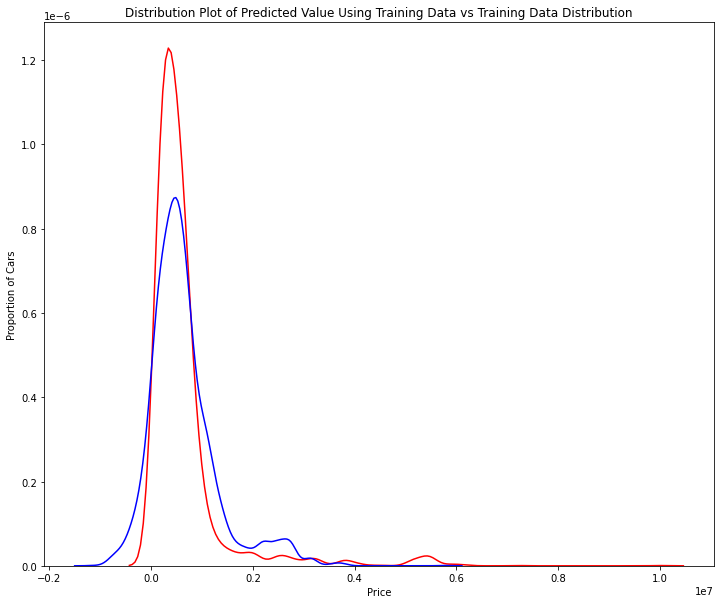

In [400]:
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(Y_train, training_data_prediction, "Actual Values (Train)", "Predicted Values (Train)", Title)

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


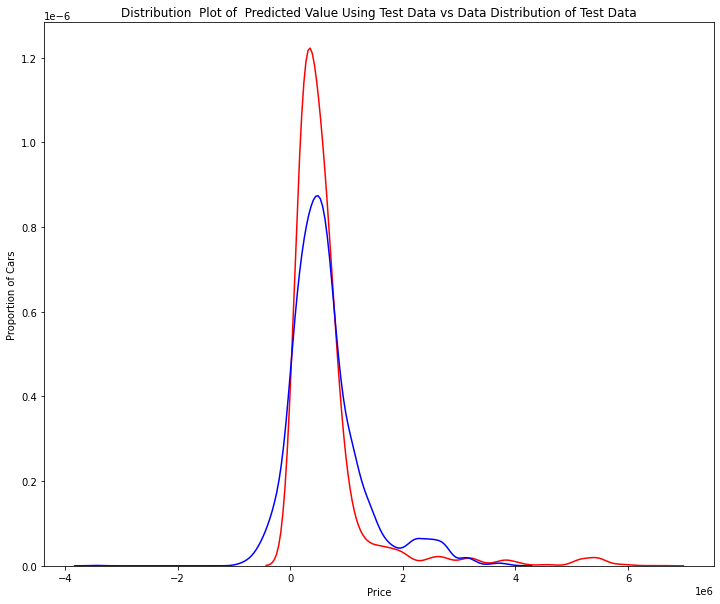

In [401]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(Y_test,test_data_prediction,"Actual Values (Test)","Predicted Values (Test)",Title)

<h3>
2. Lasso Regression
</h3>

In [402]:
#Splitting Train and test data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.45, random_state=2)

In [403]:
lasso_reg = Lasso()

In [404]:
lasso_reg.fit(X_train, Y_train)

Lasso()

In [405]:
training_data_prediction = lasso_reg.predict(X_train)
test_data_prediction = lasso_reg.predict(X_test)

In [406]:
print("R squared Error for training data: ",lasso_reg.score(X_train,Y_train))
print("R squared Error for testing data: ",lasso_reg.score(X_test,Y_test))

R squared Error for training data:  0.6724797759415524
R squared Error for testing data:  0.6638132131461139


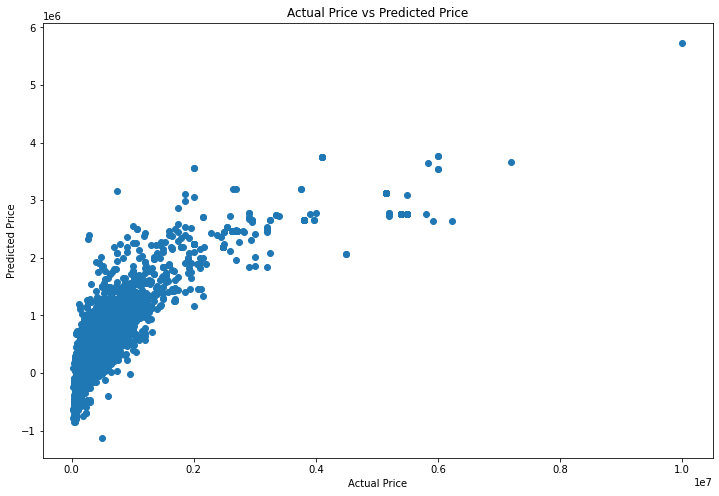

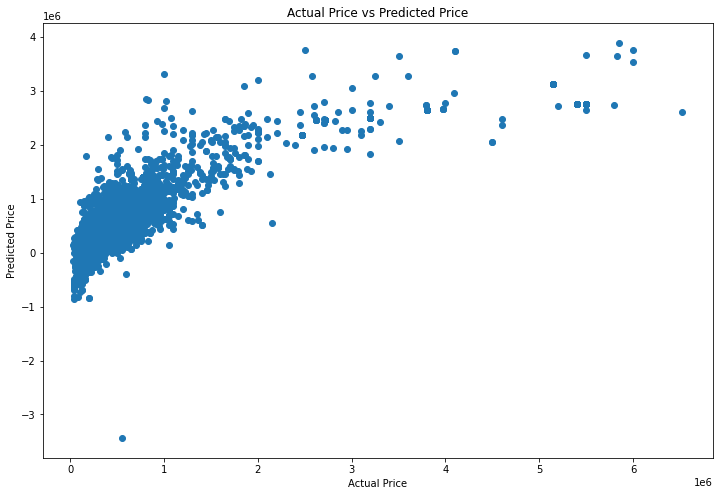

In [407]:
plt.figure(figsize=(12,8))
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

plt.figure(figsize=(12,8))
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


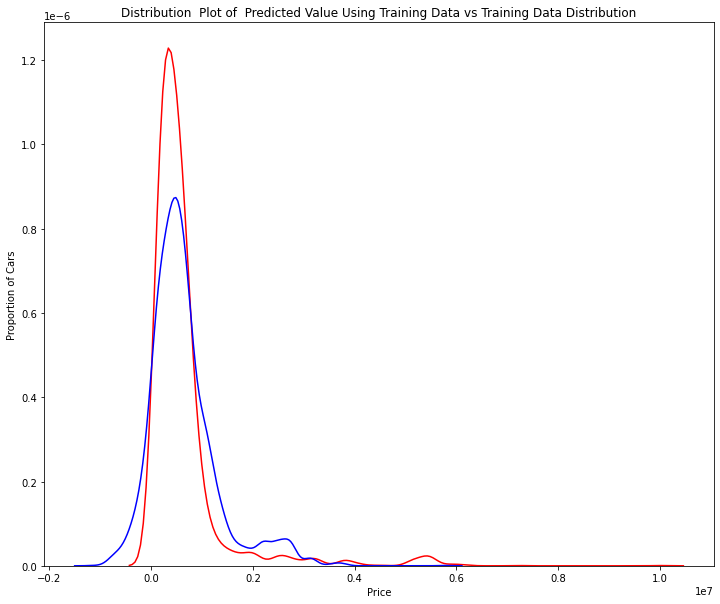

In [408]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(Y_train, training_data_prediction, "Actual Values (Train)", "Predicted Values (Train)", Title)

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


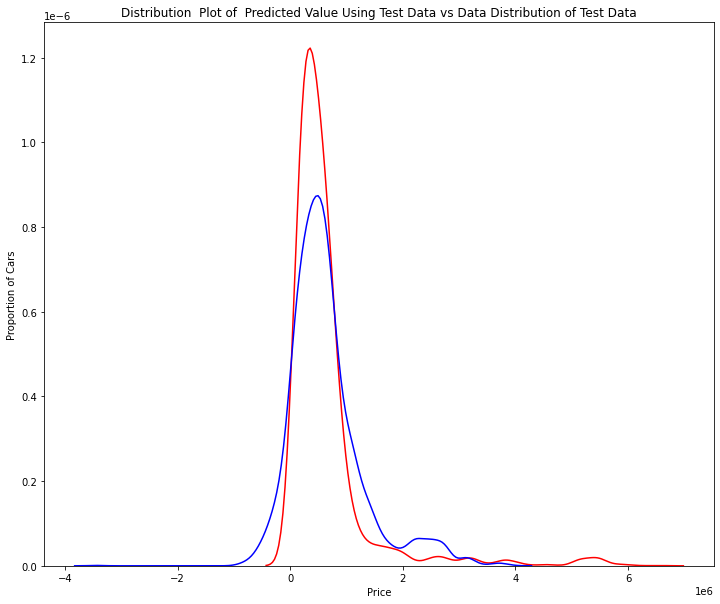

In [409]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(Y_test,test_data_prediction,"Actual Values (Test)","Predicted Values (Test)",Title)

<h3>
3. Polynomial Regression
</h3>

In [410]:
from sklearn.preprocessing import PolynomialFeatures

In [411]:
#Splitting Train and test data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.45, random_state=2)

In [412]:
pr = PolynomialFeatures(degree=2)

In [413]:
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

In [414]:
x_train_pr.shape

(4470, 66)

In [415]:
poly1 = LinearRegression().fit(x_train_pr1,y_train)

In [416]:
training_data_prediction = poly1.predict(x_train_pr)
test_data_prediction = poly1.predict(x_test_pr)

In [417]:
print("R squared Error for training data: ",poly1.score(x_train_pr,Y_train))
print("R squared Error for testing data: ",poly1.score(x_test_pr,Y_test))

R squared Error for training data:  0.9138993120266622
R squared Error for testing data:  0.881575087159473


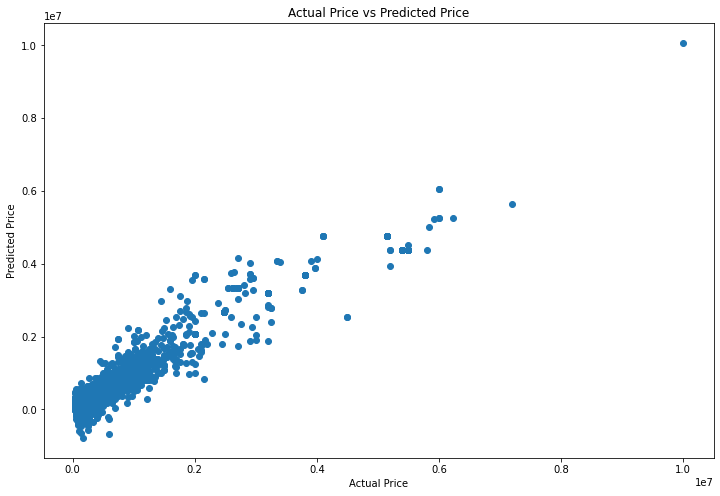

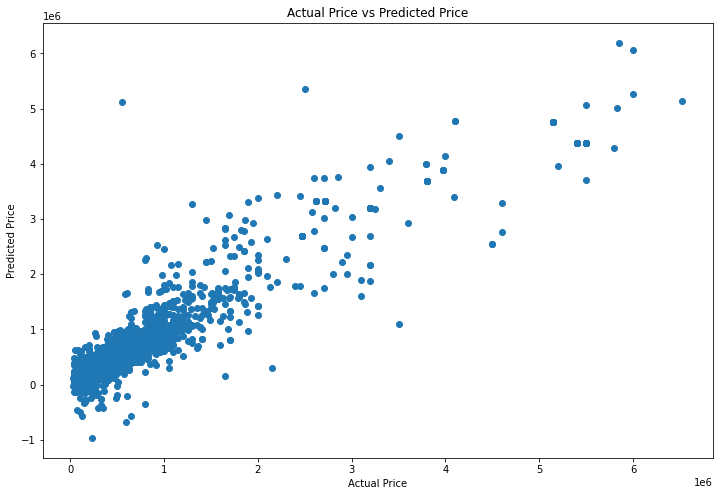

In [418]:
plt.figure(figsize=(12,8))
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

plt.figure(figsize=(12,8))
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price vs Predicted Price")
plt.show()

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


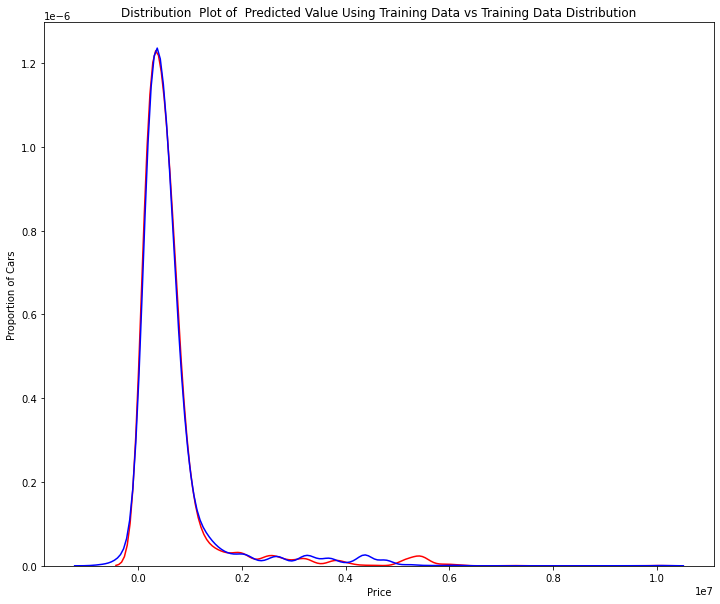

In [419]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(Y_train, training_data_prediction, "Actual Values (Train)", "Predicted Values (Train)", Title)

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


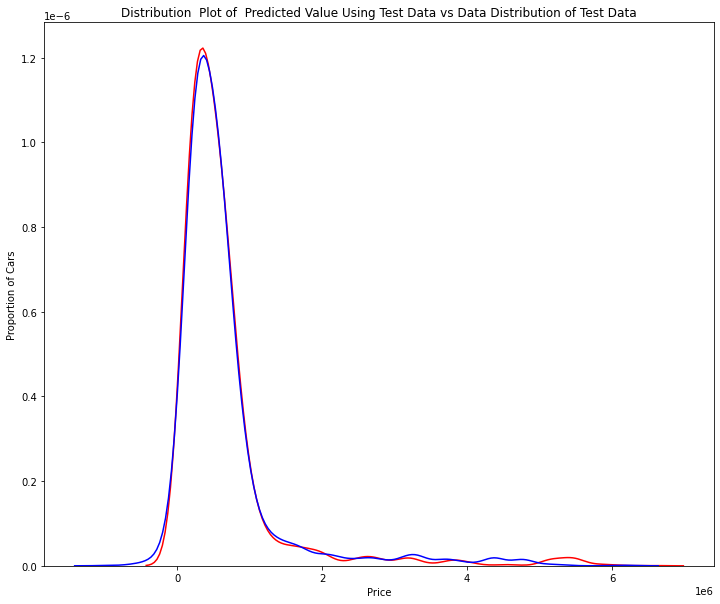

In [420]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(Y_test,test_data_prediction,"Actual Values (Test)","Predicted Values (Test)",Title)

|S.no | Regression Model | R squared Error for training data | R squared Error for testing data |
|---------|---------|---------|---------|
|1| Linear regression| 0.6724797759842325 | 0.6638131107861478| 
|2| Lasso regression| 0.6724797759415524 | 0.6638132131461139|
|3| Polynomial regression| 0.9138993120266622 | 0.881575087159473 |

Since, from above analysis we can say that Polynomial regression is best suited for our data set